Made using assisstance from GenAI Tools

In [2]:
import networkx as nx
import ast, time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
text_files = ["graph_data_10_edges.txt", "graph_data_20_edges.txt", "graph_data_30_edges.txt", "graph_data_40_edges.txt"]
dfs = []
for file in text_files:
  with open(file, "r") as f:
    edges = [ast.literal_eval(line.strip()) for line in f]

  num_edges = int(file.split("_")[2])
  df = pd.DataFrame({"Edges": edges, "Number of Edges":num_edges})

  dfs.append(df)

graph_data = pd.concat(dfs, ignore_index=True)
display(graph_data)

,Edges,Number of Edges
0,"(1, 9)",10
1,"(1, 3)",10
2,"(2, 5)",10
3,"(3, 5)",10
4,"(4, 8)",10
...,...,...
95,"(7, 8)",40
96,"(7, 10)",40
97,"(8, 10)",40
98,"(8, 9)",40


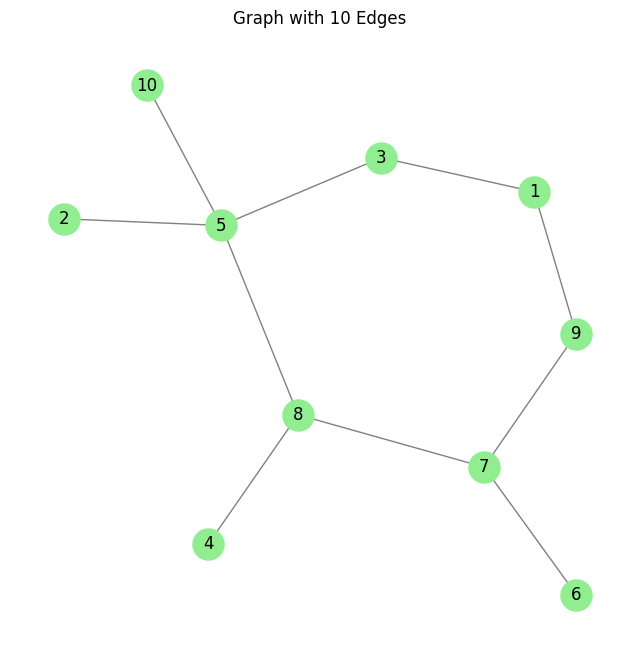

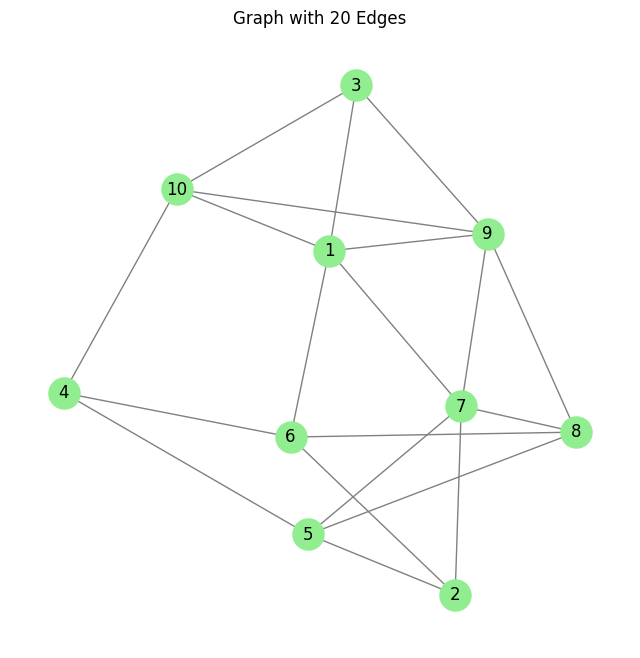

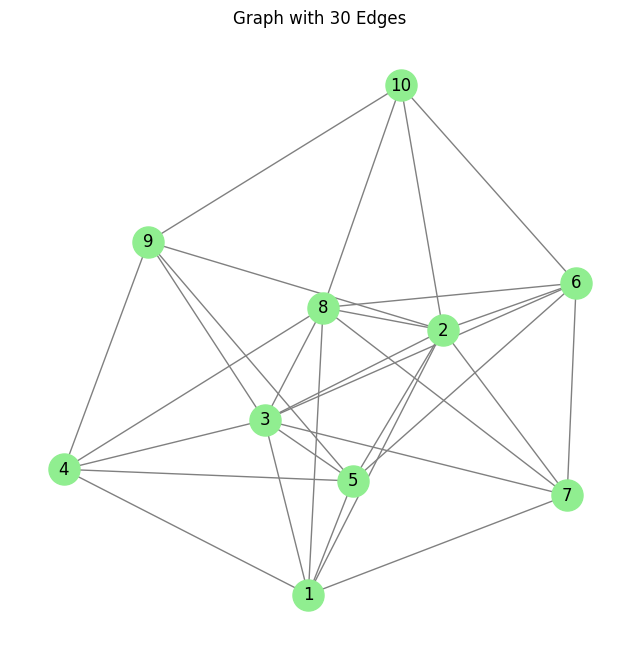

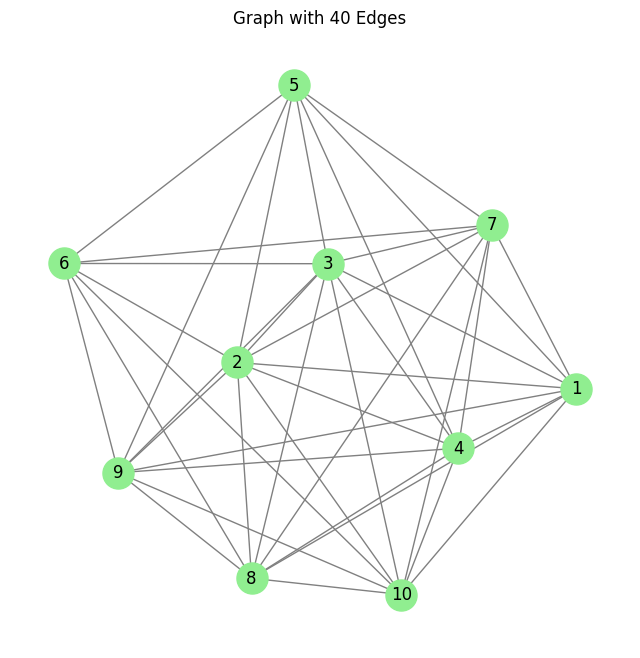

In [4]:
graphs = {}
num_vertices = 10 # n = 10 for m = 10, 20, 30, and 40
for num_edges, group in graph_data.groupby("Number of Edges"):
    G = nx.Graph()
    G.add_nodes_from(range(1, num_vertices + 1)) # adding fixed nodes from 1 to 10

    for edge in group["Edges"]:
      G.add_edge(*edge)

    graphs[num_edges] = G

for num_edges, G in graphs.items():
    fig, ax = plt.subplots(figsize=(8, 8))
    nx.draw(G, with_labels=True, ax=ax, node_size=500, node_color='lightgreen', edge_color='gray')
    ax.set_title(f"Graph with {num_edges} Edges")
    plt.show()
    print("\n")

Functions for Matching and finding vertex cover using ChatGPT

In [5]:
def maximal_matching(graph):
    matching = set()
    matched = set()

    for u, v in graph.edges():
        if u not in matched and v not in matched:
            matching.add((u, v))
            matched.update([u, v])

    return matching


def get_vertex_cover_from_matching(matching):
    vertex_cover = set()
    for u, v in matching:
        vertex_cover.add(u)
        vertex_cover.add(v)
    return vertex_cover

Results from 2-Factor Approximation

In [17]:
results = {}

for num_edges, graph in graphs.items():
    start_time = time.time() # Start timing
    max_match = maximal_matching(graph)
    vertex_cover = get_vertex_cover_from_matching(max_match)
    end_time = time.time() # End timing
    elapsed_time = end_time - start_time # Calculate elapsed time

    results[num_edges] = {
        "Matching": max_match,
        "Maximal Matching Size": len(max_match),
        "Vertex Cover Size": len(vertex_cover),
        "Time Taken (s)": elapsed_time # Add time taken to results
    }

for num_edges, result in results.items():
    print(f"Graph with {num_edges} Edges:")
    print(f"  Matching: {result['Matching']}")
    print(f"  Maximal Matching Size: {result['Maximal Matching Size']}")
    print(f"  Vertex Cover Size: {result['Vertex Cover Size']}")
    print(f"  Time Taken (s): {result['Time Taken (s)']:.6f}") # Display time with more precision
    print("-" * 20)

Graph with 10 Edges:
  Matching: {(6, 7), (2, 5), (1, 9), (4, 8)}
  Maximal Matching Size: 4
  Vertex Cover Size: 8
  Time Taken (s): 0.000038
--------------------
Graph with 20 Edges:
  Matching: {(9, 10), (4, 5), (2, 6), (1, 3), (7, 8)}
  Maximal Matching Size: 5
  Vertex Cover Size: 10
  Time Taken (s): 0.000017
--------------------
Graph with 30 Edges:
  Matching: {(1, 5), (4, 9), (3, 7), (6, 10), (2, 8)}
  Maximal Matching Size: 5
  Vertex Cover Size: 10
  Time Taken (s): 0.000016
--------------------
Graph with 40 Edges:
  Matching: {(5, 7), (2, 9), (6, 10), (4, 8), (1, 3)}
  Maximal Matching Size: 5
  Vertex Cover Size: 10
  Time Taken (s): 0.000015
--------------------


Using Gemini highlighted the edges found in max matching

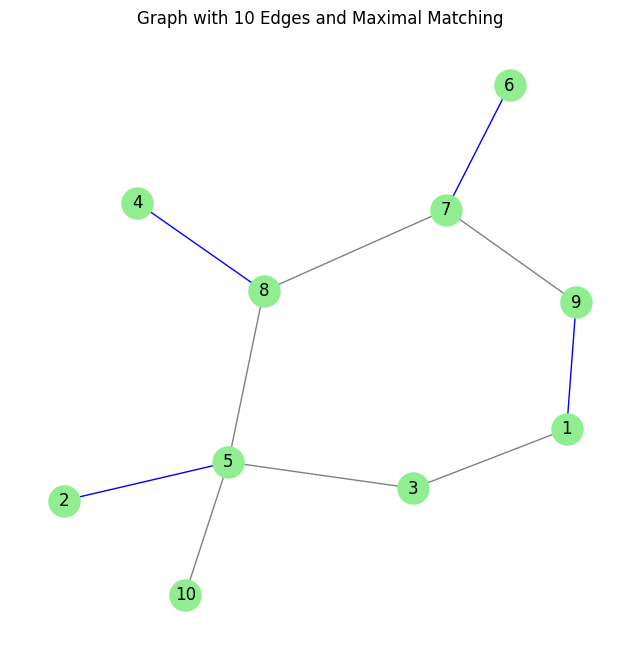

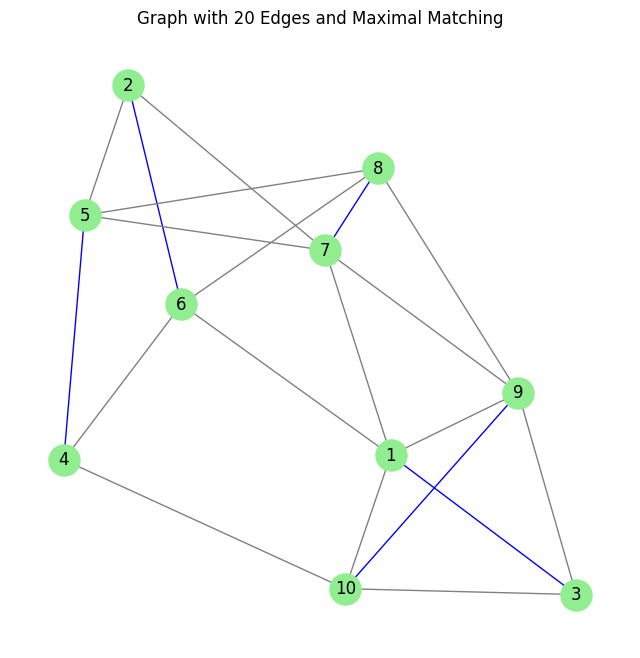

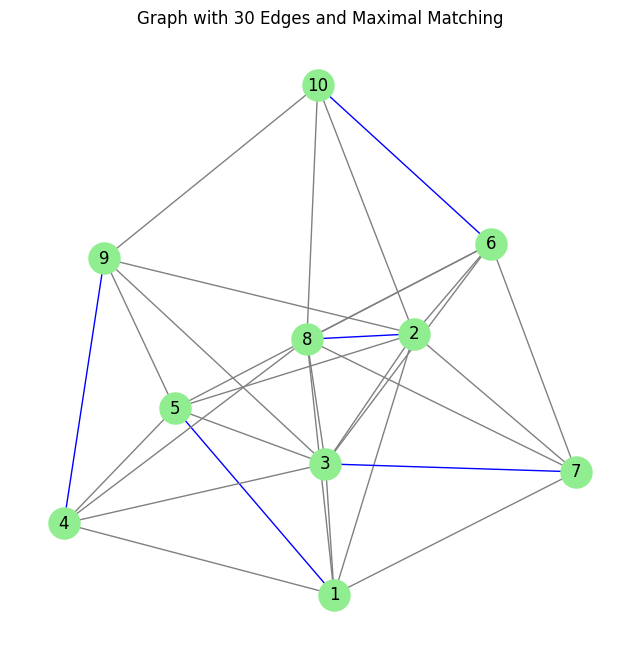

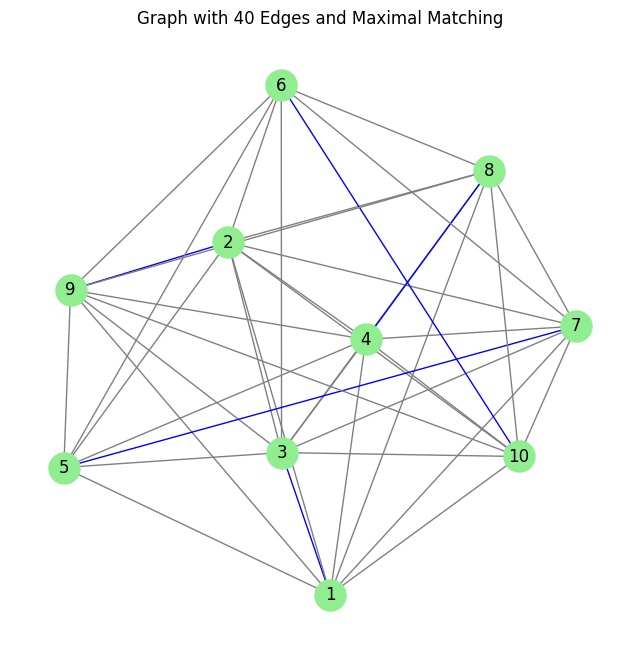

In [26]:
# Visualize vertex cover and maximal matching in original graphs
for num_edges, graph_to_visualize in graphs.items():
    max_match = maximal_matching(graph_to_visualize)
    vertex_cover = get_vertex_cover_from_matching(max_match)

    # Create a list of edge colors, highlighting edges in the maximal matching
    edge_colors = ['blue' if edge in max_match or (edge[1], edge[0]) in max_match else 'gray' for edge in graph_to_visualize.edges()]


    fig, ax = plt.subplots(figsize=(8, 8))
    nx.draw(graph_to_visualize, with_labels=True, ax=ax, node_size=500, node_color = 'lightgreen', edge_color=edge_colors)
    ax.set_title(f"Graph with {num_edges} Edges and Maximal Matching")
    plt.show()
    print("\n")

In [12]:
# Read the brute force results from the CSV file
brute_force_results = pd.read_csv('vertex_cover_results.csv')

# Display the imported data
display(brute_force_results)

,num_edges,vertex_cover,cover_size,time_taken
0,10,"[(1, 4, 5, 7), (1, 5, 7, 8)]",4,0.000252
1,20,"[(1, 5, 6, 7, 9, 10), (3, 5, 6, 7, 9, 10)]",6,0.000788
2,30,"[(1, 2, 3, 4, 6, 8, 9), (1, 2, 3, 5, 6, 8, 9),...",7,0.001092
3,40,"[(1, 2, 3, 4, 5, 6, 8, 10), (1, 2, 3, 4, 6, 7,...",8,0.002080


Time Plot with Gemini

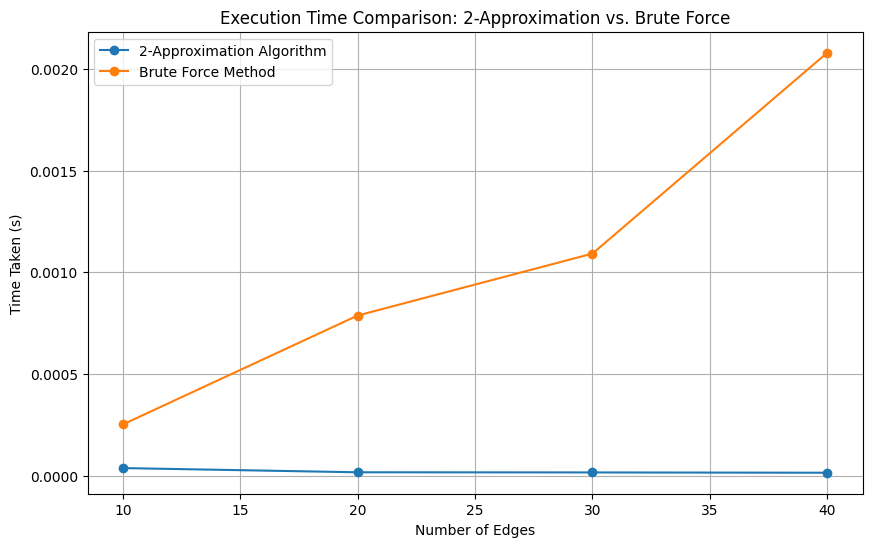

In [24]:
approx_results = pd.DataFrame(results).T.reset_index()
approx_results.columns = ['num_edges', 'Matching','Maximal Matching Size', 'Vertex Cover Size', 'Time Taken (s)']
time_comparison = pd.merge(
    approx_results[['num_edges', 'Time Taken (s)']].rename(columns={'Time Taken (s)': 'Approximation Time (s)'}),
    brute_force_results[['num_edges', 'time_taken']].rename(columns={'time_taken': 'Brute Force Time (s)'}),
    on='num_edges'
)


# Plot the time comparison
plt.figure(figsize=(10, 6))
plt.plot(time_comparison['num_edges'], time_comparison['Approximation Time (s)'], marker='o', linestyle='-', label='2-Approximation Algorithm')
plt.plot(time_comparison['num_edges'], time_comparison['Brute Force Time (s)'], marker='o', linestyle='-', label='Brute Force Method')

plt.xlabel('Number of Edges')
plt.ylabel('Time Taken (s)')
plt.title('Execution Time Comparison: 2-Approximation vs. Brute Force')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
display(time_comparison)

,num_edges,Approximation Time (s),Brute Force Time (s)
0,10,0.000038,0.000252
1,20,0.000017,0.000788
2,30,0.000016,0.001092
3,40,0.000015,0.002080


Made a summary dataframe using Gemini

In [30]:
comparison_df = pd.merge(approx_results, brute_force_results, on='num_edges')

# Calculate the approximation factor
comparison_df['Approximation Factor'] = comparison_df['Vertex Cover Size'] / comparison_df['cover_size']

# Display the complete comparison dataframe
print("Complete Comparison DataFrame:")
display(comparison_df)

# Select and display the relevant columns for comparing cover sizes and the approximation factor
print("\nApproximation Factor Comparison:")
approximation_factor_comparison_df = comparison_df[['num_edges','Matching', 'Vertex Cover Size', 'cover_size', 'Approximation Factor','Time Taken (s)','time_taken']]
approximation_factor_comparison_df = approximation_factor_comparison_df.rename(columns={
    'Vertex Cover Size': '2-Approximation Vertex Cover Size',
    'cover_size': 'Optimum Vertex Cover Size',
    'vertex_cover': 'Optimum Vertex Cover',
    "Matching": "Max Matching",
    "time_taken": "Time Taken (Brute Force)",
    "Time Taken (s)": "Approximation Time"
})

display(approximation_factor_comparison_df)

Complete Comparison DataFrame:


,num_edges,Matching,Maximal Matching Size,Vertex Cover Size,Time Taken (s),vertex_cover,cover_size,time_taken,Approximation Factor
0,10,"{(6, 7), (2, 5), (1, 9), (4, 8)}",4,8,0.000038,"[(1, 4, 5, 7), (1, 5, 7, 8)]",4,0.000252,2.0
1,20,"{(9, 10), (4, 5), (2, 6), (1, 3), (7, 8)}",5,10,0.000017,"[(1, 5, 6, 7, 9, 10), (3, 5, 6, 7, 9, 10)]",6,0.000788,1.666667
2,30,"{(1, 5), (4, 9), (3, 7), (6, 10), (2, 8)}",5,10,0.000016,"[(1, 2, 3, 4, 6, 8, 9), (1, 2, 3, 5, 6, 8, 9),...",7,0.001092,1.428571
3,40,"{(5, 7), (2, 9), (6, 10), (4, 8), (1, 3)}",5,10,0.000015,"[(1, 2, 3, 4, 5, 6, 8, 10), (1, 2, 3, 4, 6, 7,...",8,0.002080,1.25



Approximation Factor Comparison:


,num_edges,Max Matching,2-Approximation Vertex Cover Size,Optimum Vertex Cover Size,Approximation Factor,Approximation Time,Time Taken (Brute Force)
0,10,"{(6, 7), (2, 5), (1, 9), (4, 8)}",8,4,2.0,0.000038,0.000252
1,20,"{(9, 10), (4, 5), (2, 6), (1, 3), (7, 8)}",10,6,1.666667,0.000017,0.000788
2,30,"{(1, 5), (4, 9), (3, 7), (6, 10), (2, 8)}",10,7,1.428571,0.000016,0.001092
3,40,"{(5, 7), (2, 9), (6, 10), (4, 8), (1, 3)}",10,8,1.25,0.000015,0.002080


In [31]:
# Save the comparison dataframe to a CSV file
approximation_factor_comparison_df.to_csv('practical2Results.csv', index=False)

print("practical2Results.csv")

practical2Results.csv
